# Machine-Learning TD
By Corentin Meyer, PhD Student @ CSTB - iCube, 04/10 ESBS


# PART 1: Exploration, formating and data split

## The Data that we will use
## [Stroke Prediction Dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)
### **Context**
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.
Attribute Information
### **11 clinical features for predicting stroke events**
1. **id:** unique identifier
2. **gender:** "Male", "Female" or "Other"
3. **age**: age of the patient
4. **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. **ever_married**: "No" or "Yes"
7. **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. **Residence_type**: "Rural" or "Urban"
9. **avg_glucose_level**: average glucose level in blood
10. **bmi**: body mass index
11. **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. **stroke**: 1 if the patient had a stroke or 0 if not  
* Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## **Tasks: Data Exploration**
1. Import the data (and set the dataframe index to the ID column)
2. Print the shape of the dataset and the first 5 lines
3. Calculate the ratio stroke/non-stroke  
4. Plot histogram of the "age" column separate by stroke vs non-stroke status.
5. Print the type of each columns (number, object...)

## **Questions:**
1. How many entries (patients) are in the dataset ?
2. How many columns (features) ?
3. Plot the histogram of the age feature. Do separate histogram for stroke vs non-stroke patients
4. What is the percentage of the patients that had a stroke ?
5. Show the type of data in each columns. What type of processing will we have to do for each type ?

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

# Import the data using read_csv() and set the index with set_index()
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.set_index("id", inplace=True)

# Print the shape of the dataframe and the head using df.shape and df.head()
print(df.shape)
df.head()

(5110, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


0    0.951272
1    0.048728
Name: stroke, dtype: float64


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

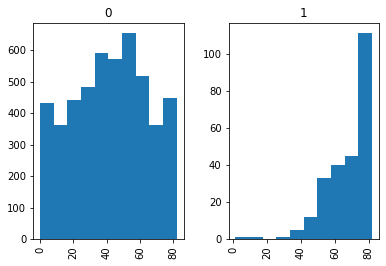

In [3]:
# Use value_counts() on the "stroke" column.
print(df["stroke"].value_counts(normalize=True))

# Use pandas built-in dataframe .hist() methods to plot the histo of the "age" column
df.hist("age", by="stroke")

In [4]:
# Print the "dtypes" attribute of dataframe
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## **Tasks: Data Formating**
You will now do the pre-processing of data.
For each type of object you will have to process them in a usable format for ML algorithm.

## **Questions**
1. What columns are categorical data, what columns are numeric.
2. What columns are already ready to be used and needs no change.
3. What type of processing do you need to do on categorical data and why
4. What type of processing do you need to do on numeric data and why
5. What columns contains missing data ? What type of processing do you need to do in this case.

## **Ressources**:
[Google's Class: Transforming Numeric Data](https://developers.google.com/machine-learning/data-prep/transform/transform-numeric)  
[Google's Class: Transforming Categorical Data](https://developers.google.com/machine-learning/data-prep/transform/transform-categorical)

![Categorial Feature](https://i.imgur.com/mRFk0Sh.png)

In [8]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Create lists with columns names for each processing categories
columns_nothing = ["hypertension", "heart_disease", "stroke"]
columns_categorical = ["gender","ever_married", "work_type", "Residence_type", "smoking_status"]
columns_numeric = ["age", "avg_glucose_level","bmi"]

# Nothing-To-Do Cols: just select them and convert the pandas dataframe to numpy array ( to_numpy() )
X_nothing_to_do = df[columns_nothing]
X_nothing_to_do = X_nothing_to_do.to_numpy()

# Categorial data to numeric: do one hot encoding ( OneHotEncoder(), .fit_transform and .toarray() )
enc = OneHotEncoder()
X_cat = df[columns_categorical]
X_cat_onehot = enc.fit_transform(X_cat).toarray()
X_cat_columns_onehot = enc.get_feature_names()

# Numeric data: do scaling (0-1) (StandardScaler() and .fit_transform())
X_num = df[columns_numeric]
X_num_scaled = StandardScaler().fit_transform(X_num)
X_num_columns_scaled = X_num.columns

# Combine the nothing_to_do_columns, one-hot cols, and numeric data into a numpy array
# using np.concatenate
array_data = np.concatenate((X_cat_onehot, X_num_scaled, X_nothing_to_do), axis=1)

# Missing Data: Use imputer to predict them ( IterativeImputer() and .fit_transform() )
imp_mean = IterativeImputer(random_state=777)
imp_mean.fit(array_data)
array_data = imp_mean.transform(array_data)

# You can recreate a DataFrame for pretty printing, but this is optional.
df_data  = pd.DataFrame(data=array_data, columns=list(X_cat_columns_onehot) + list(X_num_columns_scaled) + columns_nothing)

## **Tasks: Data Train/Test Spliting**
Now you can split the data between training and testing data.

## **Questions**
1. What train/test ratio should you use.
2. How many entries are in your train dataset and in your test dataset.
3. Verify that you have the same stroke / no-stroke ratio between train and test dataset.

In [6]:
from sklearn.model_selection import train_test_split
# From your numpy array that you created, separate the X columns (features) and the Y column (label) in two variables
X = array_data[:,:-1]
Y = array_data[:,-1]

# Use train_test_split() using X and Y with the ratio you selected.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=777)

# Print X_train and X_test shape, use np.unique on y_train, x_test to get the 0/1 ratio
print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train, return_counts=True)[1])
print(np.unique(y_test, return_counts=True)[1])

(3066, 21)
(2044, 21)
[2925  141]
[1936  108]


# PART 2: Create your machine-learning model

## **Tasks: Choose a model and do basic evaluation**
Select from scikit-learn a model and train it (fit) with the train data. Then calculate the accuracy of the model on the test data. Plot the confusion matrix of the test data classification.

## **Questions:**
1. Which model did you choose and why ? Have you set any particular (hyper)parameters ?
2. What accuracy-score do you get and what conclusion can you take ?
3. What do you observe on the confusion matrix and what conclusion can you take ?

![Accuracy and Confusion Matrix](https://i.imgur.com/EAf5SNh.png)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Select a model from: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

# For example: create a clf variable containing a RandomForestClassifier(). 
# Don't hesitate to tweak its parameters as you like ! You can experiment.
# Use fit() on clf variable with your x_train and y_train to train the model.
clf = 

# Using the .score() method of clf, print its accuracy on x_test, y_test
print()
# Plot the confusion matrix using plot_confusion_matrix with clf, x_test, y_test)

## **Tasks: Correct the previous issue**
You will now try to downsample your majority class to the level of minority class to have a 50/50 ratio and re-do a train/test split.  
Then you will re-train a new model with the new ratio-corrected data and get accuracy+confusion matrix plot.
Don't only predict the class, but also show the prediction probability for all data in the test set !
## **Questions**
1. What accuracy-score do you get with the new model and what conclusion can you take.
2. What do you observe on the confusion matrix and what conclusion can you take.
3. Did you managed to print the probability of each prediction ? What's the shape of the prediction probability output ? Is there a high variance between the different test entries in probability ?

![Downsampling](https://i.imgur.com/QPOuSKk.png)

In [ ]:
# Using this tutorial: https://chrisalbon.com/code/machine_learning/preprocessing_structured_data/handling_imbalanced_classes_with_downsampling/
# We will downsample our data by using the code in the "Downsample Majority Class To Match Minority Class" section.
# Remember to switch 0 and 1 from the tutorial as here our dominant class is 0 and not 1.
np.random.seed(777)
i_class0 = 
i_class1 = 
# Number of observations in each class
n_class0 = 
n_class1 = 
# For every observation of class 1, randomly sample from class 0 without replacement
i_class0_downsampled = 
# Join together class 1's target vector with the downsampled class 0's target vector
Y_down = 
X_down = 

# Re-do a train/test split but this time on the new X_down and Y_down data (downsampled).
# Call the new variables X_train_down, X_test_down, y_train_down, y_test_down for example.
X_train_down, X_test_down, y_train_down, y_test_down = 

# Recreate a model called clf_down with RandomForestClassifier()
# And fit() it this time on X_train_down, y_train_down
clf_down = 

# Calculate its accuracy using the .score() methods on X_test_down, y_test_down
print()
# Plot the confusion matrix as before, but with clf_down, X_test_down, y_test_down

# Print the prediction probablity of the first 10 test data points using .predict_proba of the model.


# PART 3: Evaluate your model

## **Tasks: See all common metrics and evalute both models !**
In this last part you will have to calculate all relevant metrics for a binary classification to compare your two models.  
Make a table containing the results for both models in terms of: accuracy, balance accuracy, F1 Score, sensitivity (recall), specificity, Precision and confusion matrix data (True Pos., True Neg., False Pos., False Neg.)

## **Questions:**
1. Which model have the accuracy ?
2. Which model have the best area under the curve (AUC) for the ROC-curve ?
3. Which model have the best F1-Score and sensitivity ?
4. Eventually, which model is better according to you ?

![Roc Curve](https://i.imgur.com/DFw604d.png)
![F1-Score](https://i.imgur.com/8b5AkS3.png)

In [ ]:
# Calculate all relevant metrics for a binary classification
# Using Scikit score function: https://scikit-learn.org/stable/modules/model_evaluation.html
# Calculate: Accuracy, Balanced Accuracy, F1 Score, Sensitivity (Recall), Specificity, Precision, TP TN FP FN
# Also plot the ROC Curve and the Precision-Recall Curve using scikit built-in function

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

def get_all_metrics(clf, X_test, y_test):
	""""Function that returns all the metrics for a given classifier and test data"""
	# Use classifier to predict the Y label of X_test data with clf.predict()
	y_pred = 

	# Confusion Matrix results
	tn, fp, fn, tp = 

	# Calculate the metrics: accuracy, balanced accuracy, recall, precision, F1-score, specificity
	ac = 
	bac = 
	re = 
	pr = 
	f1 = 
	sp = 

	return [bac, ac, f1, re, sp, pr, tp, tn, fp, fn]

def make_table_clf(clf, clf_down, X_test, y_test, X_test_down, y_test_down):
	""""Use the get_all_metrics function to make a table to compare two models"""
	results = get_all_metrics("...") # Fill
	results_down = get_all_metrics("...") # Fill
	df = pd.DataFrame([[i for i in results], [j for j in results_down]], columns=["Balanced-Accuracy", "Accuracy", "F1-Score", "Sensitivity (Recall)", "Specificity", "Precision", "TP"," TN", "FP", "FN"], index=["CLF","CLF DownSampled"])
	return df

In [ ]:
make_table_clf("...") # Fill with clf, clf down, and its respective X and Y data

In [ ]:
print("ROC Curve and Prec/Recall Cruve Results For Initial Classifier: ")
plot_precision_recall_curve("...") # Fill with clf, X and Y data
plot_roc_curve("...") # Fill with clf, X and Y data

In [ ]:
print("ROC Curve and Prec/Recall Cruve Results For Downsampled Classifier: ")
plot_precision_recall_curve("...") # Fill with clf_down, X_down and Y_down data
plot_roc_curve("...") # Fill with clf_down, X_down and Y_down data

# BONUS 1: Do Cross-validation instead of simple test/train split.

## **Tasks:**  
Instead of a simple Test/Train split, we will do cross-validation. This means that we will train multiple models with different splits, so that all data have been used for training and all for testing. Then we will average the results of all models.  
For example, if we do a 80/20% train/test split, then we would need to do a 5 fold cross-validation so that each data has been in the test-set at least once.  
Find a way to do "stratified k fold", calculate "cross val score" with scikit and print the mean and standard deviation of the score.
## **Questions:**  
1. What is the point of cross-validation ? Did it increase performance ? If not, what is it useful for ?

![Cross-validation](https://fr.mathworks.com/discovery/cross-validation/_jcr_content/mainParsys/image.adapt.full.medium.jpg/1623131646985.jpg)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Create a cv variable using the StratifiedKFold with 5 folds.
cv = 
# Use the cross_val_score with your clf_down model, your train data, cv varaible and select f1 as scoring method.
# Store the results in a cross_scores variables
cross_scores = cross_val_score("....")
# Print the full cross validation scores, calculate the mean and the standard deviation of these 5 folds.
print()
print()
print()

# BONUS 2:  Automatic hyper-parameters tuning

## **Tasks:**
We will use optuna to automatically find the best parameters for the chosen ML Algorithm (Random Forest here). We define a number of trials (50), a scoring metrics to maximize (F1 Score) and a parameters space to explore (params_grid).  
In the end we will have a model with the best parameters that have been found and we will compared its metrics to our previous classifier (clf_down) without optimisation.  
Try to tweak the hyper parameters spaces to shrink or expand it. Try to optimize another ML Algorithm.  
## **Questions:**  
1. What are the best parameters detected ? Are your best parameters different from the one of other students ? Why ?
2. Did the metrics improved ? Was the optimisation useful ?

## **Warnings**
This is a pretty long task depending of your computed because the program will train and test 50+ models with differents parameters. Your computer will heat up a bit for a few minutes, so don't run it if you don't want it to happens !

![Hyerparameters Tuning](https://i.imgur.com/3plYcqn.png)

In [ ]:
# If you are using Google Colab, uncomment the next line starting with ! and run the cell to install optuna
# !pip install optuna

In [ ]:
import optuna
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold, cross_val_score

def make_table_clf_opti(clf, clf_down, X_test, y_test, X_test_down, y_test_down):
	results = get_all_metrics(clf, X_test, y_test)
	results_down = get_all_metrics(clf_down, X_test_down, y_test_down)
	df = pd.DataFrame([[i for i in results], [j for j in results_down]], columns=["Balanced-Accuracy", "Accuracy", "F1-Score", "Sensitivity (Recall)", "Specificity", "Precision", "TP"," TN", "FP", "FN"], index=["CLF Down","CLF Down Optimized"])
	return df

def objective_RF(
    trial, est, x_train, y_train, param_grid, scoring_metric):
    """
    A function that is used by Optuna to get the scoring of a model given the parameters of a specific trial.
    """
    params = {
        "n_estimators": trial.suggest_int(
            "n_estimators", param_grid["n_estimators"][0], param_grid["n_estimators"][1]
        ),
        "criterion": trial.suggest_categorical("criterion", param_grid["criterion"]),
        "max_depth": trial.suggest_int(
            "max_depth", param_grid["max_depth"][0], param_grid["max_depth"][1]
        ),
        "min_samples_split": trial.suggest_int(
            "min_samples_split",
            param_grid["min_samples_split"][0],
            param_grid["min_samples_split"][1],
        ),
        "min_samples_leaf": trial.suggest_int(
            "min_samples_leaf",
            param_grid["min_samples_leaf"][0],
            param_grid["min_samples_leaf"][1],
        ),
        "max_features": trial.suggest_categorical(
            "max_features", param_grid["max_features"]
        ),
        "bootstrap": trial.suggest_categorical("bootstrap", param_grid["bootstrap"]),
        "oob_score": trial.suggest_categorical("oob_score", param_grid["oob_score"]),
        "n_jobs": trial.suggest_categorical("n_jobs", param_grid["n_jobs"]),
        "class_weight": trial.suggest_categorical(
            "class_weight", param_grid["class_weight"]
        ),
    }
    cv = StratifiedKFold(n_splits=5, shuffle=True)
    model = clone(est).set_params(**params)
    performance = np.mean(
        cross_val_score(
            model,
            x_train,
            y_train,
            cv=cv,
            scoring=scoring_metric,
            error_score="raise",
        )
    )
    return performance

# Random Forest parameters space
param_grid = {'n_estimators': [10,400],
                'criterion' : ['gini', 'entropy'],
                'max_depth' : [1, 15],
                'min_samples_split' : [2, 50], 
                'min_samples_leaf' : [1, 50],
                'max_features' : [None, 'auto','log2'],
                'bootstrap' : [True],
                'oob_score' : [False, True],
                'n_jobs' : [-1],
                'class_weight' : [None, 'balanced']}

# Run Hyperparameter Sweep: first we set up some settings.
n_trials = 50
scoring_metric = "f1"
timeout = 300 
est = RandomForestClassifier()
sampler = optuna.samplers.TPESampler()
study = optuna.create_study(direction="maximize", sampler=sampler)
optuna.logging.set_verbosity(optuna.logging.CRITICAL)

# We launch the optimization using the previous function as score-returning.
study.optimize(
    lambda trial: objective_RF(
        trial, est, X_train_down, y_train_down, param_grid, scoring_metric),
    n_trials=n_trials,
    timeout=timeout,
    catch=(ValueError,),
)
# We retrieve the best results now that the optimization is finished.
print("Best trial:")
best_trial = study.best_trial
print("  Score: ", best_trial.value)
print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

# Train model using 'best' hyperparameters
est = RandomForestClassifier()
clf = clone(est).set_params(**best_trial.params)

model = clf.fit(X_train_down, y_train_down)
y_pred = clf.predict(X_test_down)

plot_precision_recall_curve(model, X_test_down, y_test_down)
plot_roc_curve(model, X_test_down, y_test_down)
make_table_clf_opti(clf_down, model, X_test_down, y_test_down, X_test_down, y_test_down)

# Additional Ressources

Google's Class lists and ressources on ML [https://developers.google.com/machine-learning/crash-course](https://developers.google.com/machine-learning/crash-course)  
If you want to become an AI Expert: AI Rodmap [https://i.am.ai/roadmap](https://i.am.ai/roadmap)  
Visualisation in Python [https://www.python-graph-gallery.com/](https://www.python-graph-gallery.com/)  
Public Dataset to create projects [https://github.com/awesomedata/awesome-public-datasets](https://github.com/awesomedata/awesome-public-datasets)  
Machine Learning Competitions with Prize [https://www.kaggle.com/](https://www.kaggle.com/)